# Medidas de distância

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [1]:
import numpy as np
from sklearn.neighbors import DistanceMetric as dm
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [2]:
X = np.array([[0,1], [1,2], [0,6]])

## Exibindo os pontos

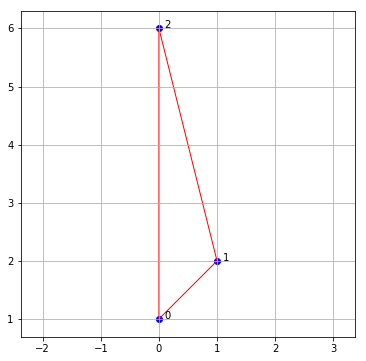

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
ax.fill(X[:, 0], X[:, 1], edgecolor='r', fill=False)
ax.scatter(x=X[:, 0], y=X[:, 1], marker='o', color='blue')
ax.set_aspect('equal', 'datalim')
for i in range(X.shape[0]):
    ax.annotate(i, (X[i, 0]+0.1, X[i, 1]))
ax.grid()

In [4]:
X

array([[0, 1],
       [1, 2],
       [0, 6]])

## Metrics intended for real-valued vector spaces

| identifier | class name |	args | distance function |
|----|----|----|----|
| "euclidean" |	EuclideanDistance |	- | $ \sqrt{ \sum_{i=0}^{n-1} (x_i - y_i)^2}$ |
| "manhattan" | ManhattanDistance | - | $ \sum_{i=0}^{n-1} |x_i - y_i| $ |
| "chebyshev" |	ChebyshevDistance |	- | $ max(|x - y|) $ |
| "minkowski" | MinkowskiDistance |	p | $ sum(|x - y|^p)^{(1/p)} $ |

### Distância euclidiana

$$ \sqrt{ \sum_{i=0}^{n-1} (x_i - y_i)^2}$$

In [5]:
dist = dm.get_metric('euclidean')
dist.pairwise(X)

array([[0.        , 1.41421356, 5.        ],
       [1.41421356, 0.        , 4.12310563],
       [5.        , 4.12310563, 0.        ]])

In [6]:
np.sqrt(np.sum(np.square(X[0,:] - X[1,:])))

1.4142135623730951

In [7]:
np.sqrt(np.sum(np.square(X[0,:] - X[2,:])))

5.0

### Distância manhattan ou city block

In [8]:
dist = dm.get_metric('manhattan')
dist.pairwise(X)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

In [9]:
dist = pdist(X,'cityblock')
squareform(dist)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

### Distância chebyshev

In [10]:
dist = dm.get_metric('chebyshev')
dist.pairwise(X)

array([[0., 1., 5.],
       [1., 0., 4.],
       [5., 4., 0.]])

### Distância minkowski

In [11]:
# euclidean
dist = dm.get_metric('minkowski', p=2)
dist.pairwise(X)

array([[0.        , 1.41421356, 5.        ],
       [1.41421356, 0.        , 4.12310563],
       [5.        , 4.12310563, 0.        ]])

In [12]:
# manhattan ou cityblock
dist = dm.get_metric('minkowski', p=1)
dist.pairwise(X)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

## Metrics intended for integer-valued vector spaces

Though intended for integer-valued vectors, these are also valid metrics in the case of real-valued vectors.


### Distância hamming

In [13]:
dist = dm.get_metric('hamming')
dist.pairwise(X)

array([[0. , 1. , 0.5],
       [1. , 0. , 1. ],
       [0.5, 1. , 0. ]])

## Metrics intended for boolean-valued vector spaces and categorical values

### Distância Jaccard

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score

In [14]:
dist = dm.get_metric('jaccard')
dist.pairwise(X)

array([[0. , 0.5, 0. ],
       [0.5, 0. , 0.5],
       [0. , 0.5, 0. ]])